# Titanic: Machine Learning

In [ ]:
Introdução Titanic

## Checklist

1. Definição do Problema
2. Obtenção dos Dados
3. Exploração dos Dados
4. Preparação dos Dados
5. Construção do Modelo
6. Avaliação

## 1. Definição do Problema

## Objetivo

descrição

## 2. Obtenção dos Dados

descrição

### Importação das bibliotecas e dos arquivos necessários

In [1]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# permitir visualizar todas as colunas
pd.options.display.max_columns = None

In [2]:
# importar os arquivos csv
train = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\ProjetoAnalise\data\train.csv', sep=',')
test = pd.read_csv(r'C:\Users\Usuário\Documents\GitHub\ProjetoAnalise\data\test.csv', sep=',')

## 3. Exploração dos dados

descrição

Com os dados apresentados abaixo, pudemos verificar os tipos de dados de cada variável, o histograma das variáveis numéricas e a porcentagem de valores faltantes.

Variáveis dos dados:

Inteiro: PassengerId, Survived, Pclass, SibSp, Parch

Objeto: Name, Sex,Cabin, Embarked, Ticket

Float: Age, Fare

Porcentagem dos dados faltantes:

Cabin          77.10%

Age            19.86%

Embarked        0.22%

#### Dicionário de Dados
survival

    Survival
        0 = No,
        1 = Yes

pclass

    Ticket
        class   1 = 1st, 
                2 = 2nd, 
                3 = 3rd

sex

    Sex

Age

    Age in years
    
sibsp

    of siblings / spouses aboard the Titanic
    
parch

    of parents / children aboard the Titanic

ticket

    Ticket number

fare

    Passenger fare
    
cabin

    Cabin number
    
embarked

    Port of Embarkation 
        C = Cherbourg, 
        Q = Queenstown, 
        S = Southampton
        
#### Variable Notes
pclass: A proxy for socio-economic status (SES)

    1st = Upper
    2nd = Middle
    3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

Parent = mother, father

Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
# identificar o tipo de cada variável da base de treino
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# ver as 5 primeiras entradas do conjunto de treino
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# verificar a porcentagem de valores faltantes da base de treino
((train.isnull().sum() / train.shape[0])*100).sort_values(ascending=False)


Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [4]:
# Distribuição estatística dos dados da base de treino
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


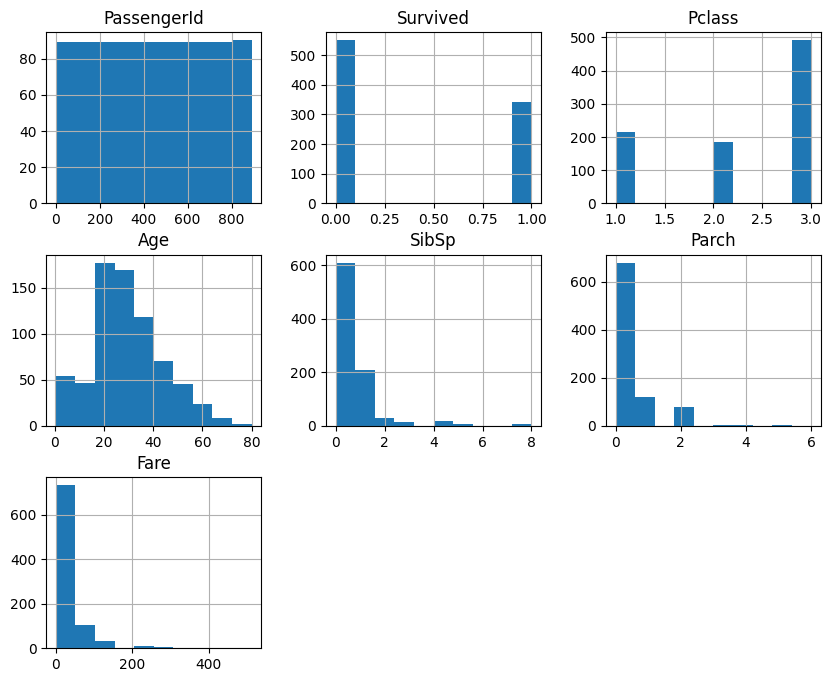

In [7]:
# ver o histograma das variáveis numéricas da base de treino
train.hist(figsize=(10,8));

### Quais grupos de pessoas possuiam maiores chances de sobrevivência?

In [22]:
# Analisar a probabilidade de sobrevivência pelo Sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


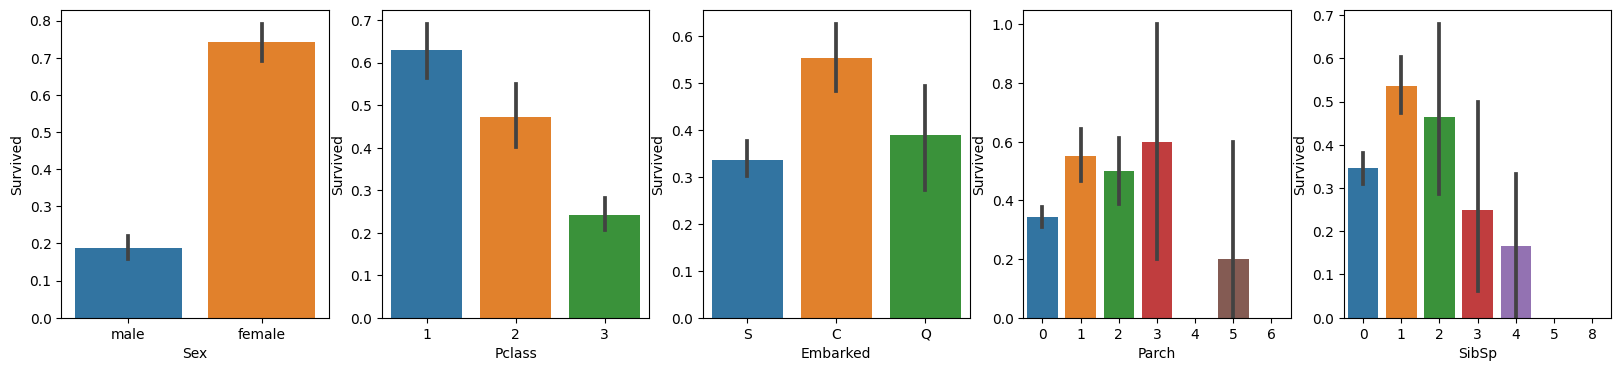

In [44]:
# Plotar gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3, axis4,axis5) = plt.subplots(1,5, figsize=(20,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3)
sns.barplot(x='Parch', y='Survived', data=train, ax=axis4)
sns.barplot(x='SibSp', y='Survived', data=train, ax=axis5);

Pelos gráficos e tabelas geradas já podemos perceber que:
    
    as mulheres possuíram mais chances de sobreviver do que os homens (75% vs. 18%).

    os passageiros de 3ª classe possuem menos da metade de chance de escaparem do desastre do que os passageiros de 1ª classe.

